In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [12]:
import xgboost as xgb

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
import seaborn as sns

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
import pickle

In [18]:
from sklearn import svm

In [19]:
import pandas as pd

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
import pandas as pd

In [22]:
import seaborn as sns

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
import tensorflow as tf

In [25]:
from tensorflow import keras

In [26]:
df=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")


In [27]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [28]:
df=df.drop('Person ID',axis=1)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [30]:
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [31]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

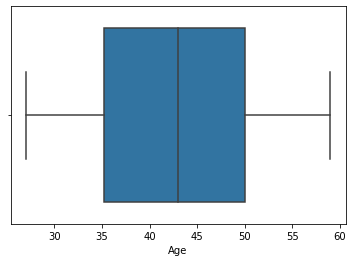

In [32]:
sns.boxplot(df['Age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sleep Duration'>

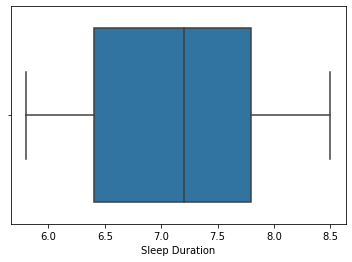

In [33]:
sns.boxplot(df['Sleep Duration'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quality of Sleep'>

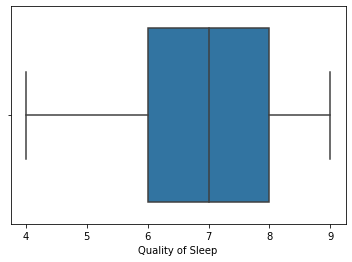

In [34]:
sns.boxplot(df['Quality of Sleep'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Physical Activity Level'>

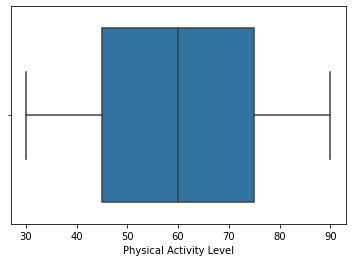

In [35]:
sns.boxplot(df['Physical Activity Level'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stress Level'>

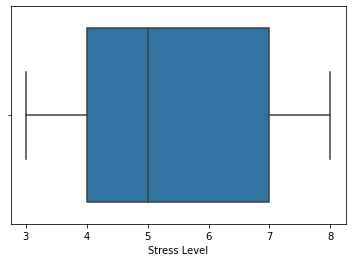

In [36]:
sns.boxplot(df['Stress Level'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Heart Rate'>

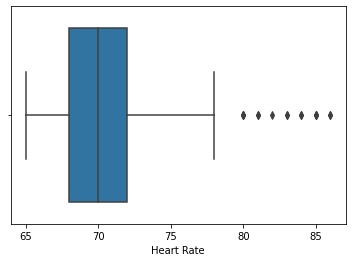

In [37]:
sns.boxplot(df['Heart Rate'])

In [38]:
q1=df['Heart Rate'].quantile(0.25)


In [39]:
q3=df['Heart Rate'].quantile(0.75)

In [40]:
IQR=q3-q1

In [41]:
lower=q1-1.5*IQR

In [42]:
upper=q3+1.5*IQR

In [43]:
df=df[(df['Heart Rate']>lower) & (df['Heart Rate']<upper)]

In [44]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daily Steps'>

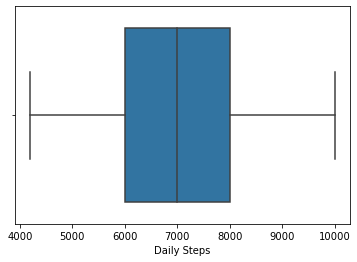

In [45]:
sns.boxplot(df['Daily Steps'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sleep Disorder', ylabel='count'>

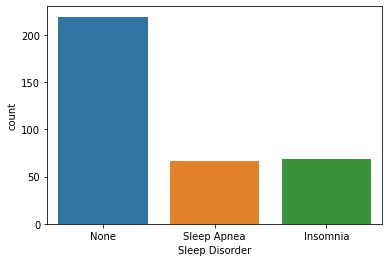

In [46]:
sns.countplot(df['Sleep Disorder'])

In [47]:
df['Sleep Disorder'].value_counts()/len(df)

None           0.618644
Insomnia       0.194915
Sleep Apnea    0.186441
Name: Sleep Disorder, dtype: float64

<AxesSubplot:xlabel='Sleep Disorder', ylabel='count'>

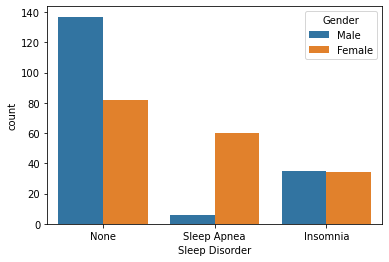

In [48]:
sns.countplot(x=df['Sleep Disorder'],hue=df['Gender'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='count'>

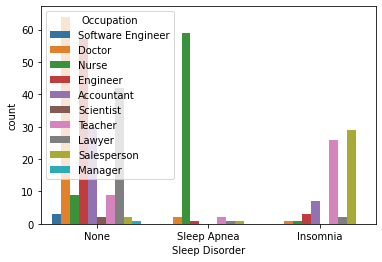

In [49]:
sns.countplot(x=df['Sleep Disorder'],hue=df['Occupation'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='count'>

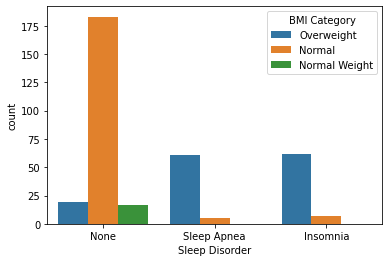

In [50]:
sns.countplot(x=df['Sleep Disorder'],hue=df['BMI Category'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='count'>

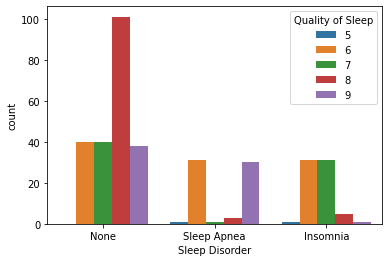

In [51]:
sns.countplot(x=df['Sleep Disorder'],hue=df['Quality of Sleep'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Daily Steps'>

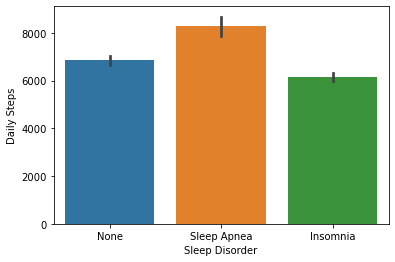

In [52]:
sns.barplot(x=df['Sleep Disorder'],y=df['Daily Steps'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Heart Rate'>

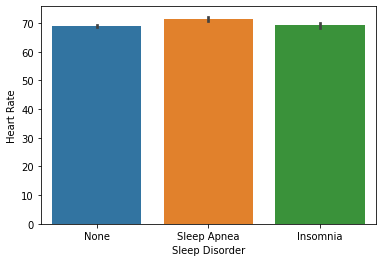

In [53]:
sns.barplot(x=df['Sleep Disorder'],y=df['Heart Rate'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Stress Level'>

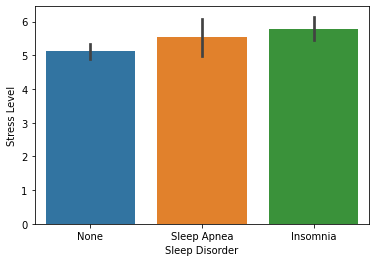

In [54]:
sns.barplot(x=df['Sleep Disorder'],y=df['Stress Level'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Physical Activity Level'>

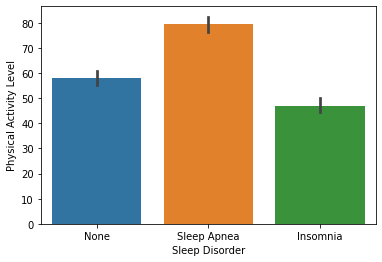

In [55]:
sns.barplot(x=df['Sleep Disorder'],y=df['Physical Activity Level'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Quality of Sleep'>

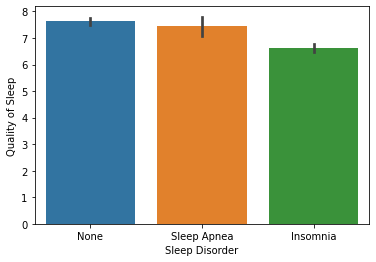

In [56]:
sns.barplot(x=df['Sleep Disorder'],y=df['Quality of Sleep'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Sleep Duration'>

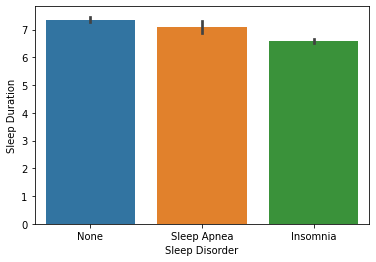

In [57]:
sns.barplot(x=df['Sleep Disorder'],y=df['Sleep Duration'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Age'>

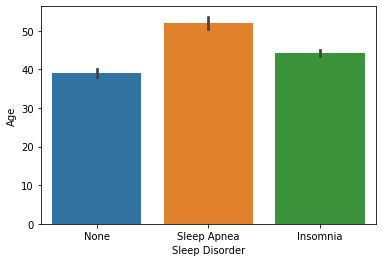

In [58]:
sns.barplot(x=df['Sleep Disorder'],y=df['Age'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Daily Steps'>

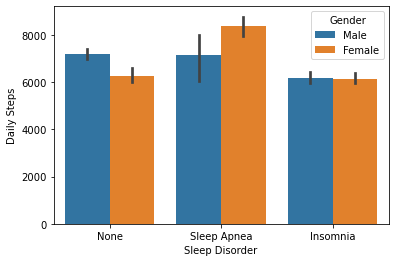

In [59]:
sns.barplot(x=df['Sleep Disorder'],y=df['Daily Steps'],hue=df['Gender'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Heart Rate'>

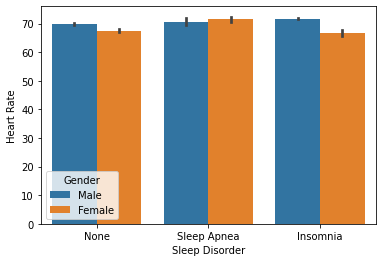

In [60]:
sns.barplot(x=df['Sleep Disorder'],y=df['Heart Rate'],hue=df['Gender'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Stress Level'>

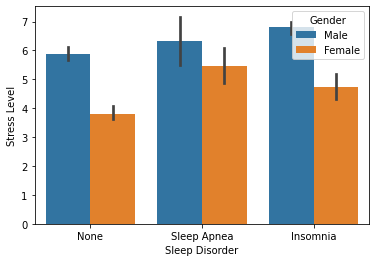

In [61]:
sns.barplot(x=df['Sleep Disorder'],y=df['Stress Level'],hue=df['Gender'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Physical Activity Level'>

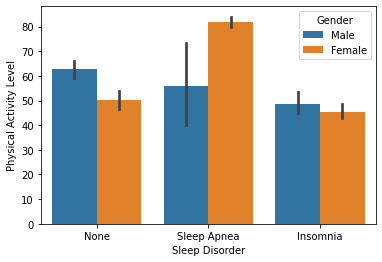

In [62]:
sns.barplot(x=df['Sleep Disorder'],y=df['Physical Activity Level'],hue=df['Gender'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Quality of Sleep'>

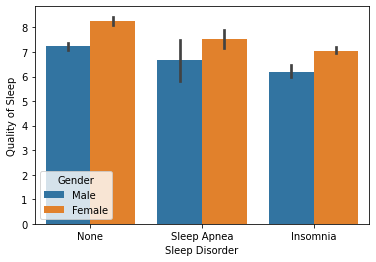

In [63]:
sns.barplot(x=df['Sleep Disorder'],y=df['Quality of Sleep'],hue=df['Gender'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Sleep Duration'>

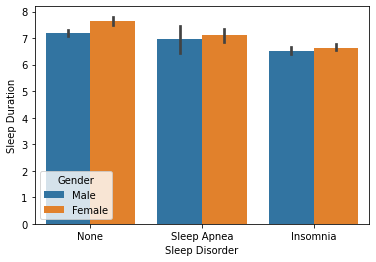

In [64]:
sns.barplot(x=df['Sleep Disorder'],y=df['Sleep Duration'],hue=df['Gender'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Age'>

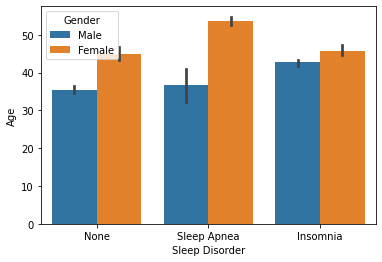

In [65]:
sns.barplot(x=df['Sleep Disorder'],y=df['Age'],hue=df['Gender'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Daily Steps'>

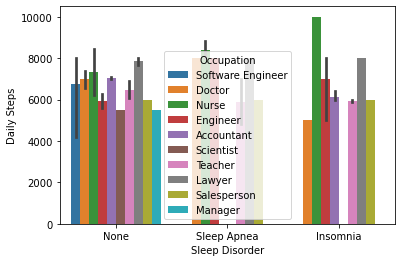

In [66]:
sns.barplot(x=df['Sleep Disorder'],y=df['Daily Steps'],hue=df['Occupation'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Heart Rate'>

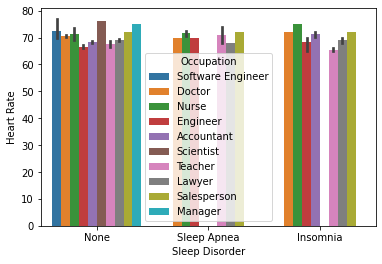

In [67]:
sns.barplot(x=df['Sleep Disorder'],y=df['Heart Rate'],hue=df['Occupation'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Stress Level'>

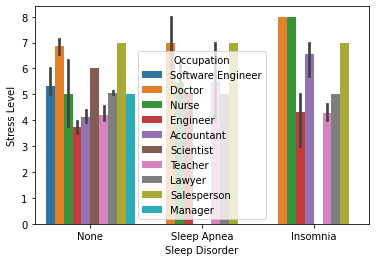

In [68]:
sns.barplot(x=df['Sleep Disorder'],y=df['Stress Level'],hue=df['Occupation'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Physical Activity Level'>

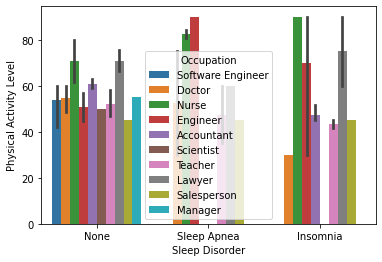

In [69]:
sns.barplot(x=df['Sleep Disorder'],y=df['Physical Activity Level'],hue=df['Occupation'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Quality of Sleep'>

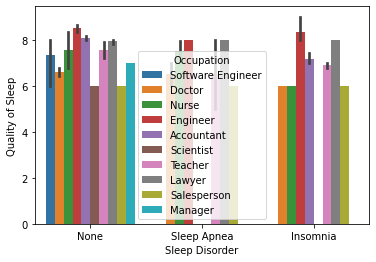

In [70]:
sns.barplot(x=df['Sleep Disorder'],y=df['Quality of Sleep'],hue=df['Occupation'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Sleep Duration'>

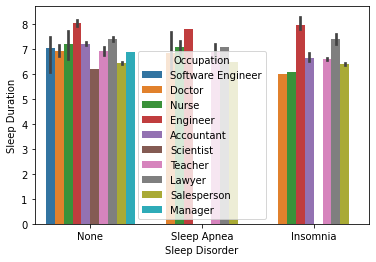

In [71]:
sns.barplot(x=df['Sleep Disorder'],y=df['Sleep Duration'],hue=df['Occupation'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Age'>

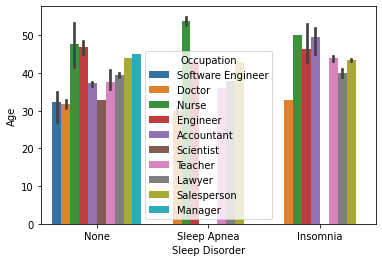

In [72]:
sns.barplot(x=df['Sleep Disorder'],y=df['Age'],hue=df['Occupation'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Daily Steps'>

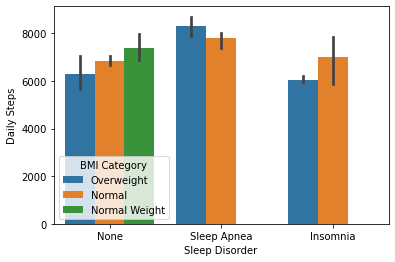

In [73]:
sns.barplot(x=df['Sleep Disorder'],y=df['Daily Steps'],hue=df['BMI Category'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Heart Rate'>

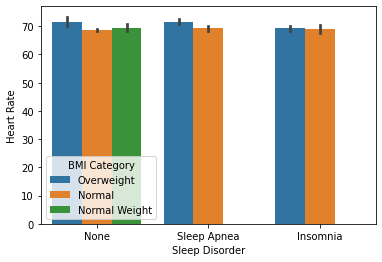

In [74]:
sns.barplot(x=df['Sleep Disorder'],y=df['Heart Rate'],hue=df['BMI Category'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Stress Level'>

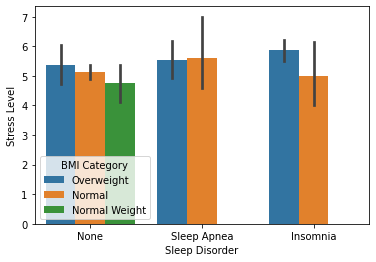

In [75]:
sns.barplot(x=df['Sleep Disorder'],y=df['Stress Level'],hue=df['BMI Category'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Physical Activity Level'>

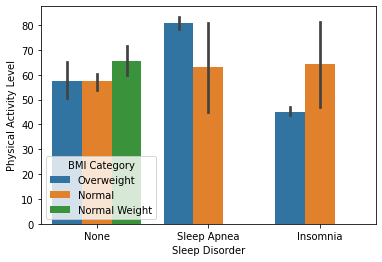

In [76]:
sns.barplot(x=df['Sleep Disorder'],y=df['Physical Activity Level'],hue=df['BMI Category'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Quality of Sleep'>

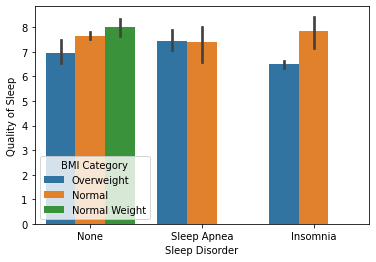

In [77]:
sns.barplot(x=df['Sleep Disorder'],y=df['Quality of Sleep'],hue=df['BMI Category'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Sleep Duration'>

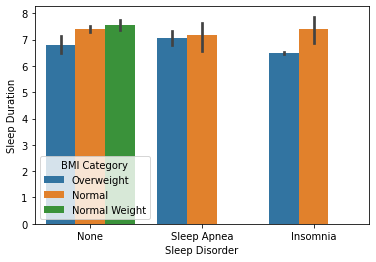

In [78]:
sns.barplot(x=df['Sleep Disorder'],y=df['Sleep Duration'],hue=df['BMI Category'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Age'>

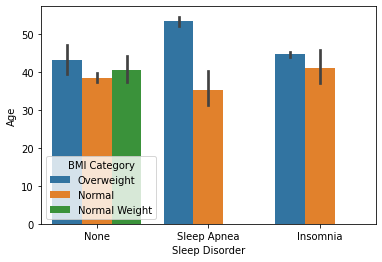

In [79]:
sns.barplot(x=df['Sleep Disorder'],y=df['Age'],hue=df['BMI Category'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Daily Steps'>

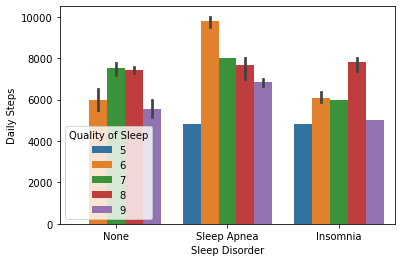

In [80]:
sns.barplot(x=df['Sleep Disorder'],y=df['Daily Steps'],hue=df['Quality of Sleep'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Heart Rate'>

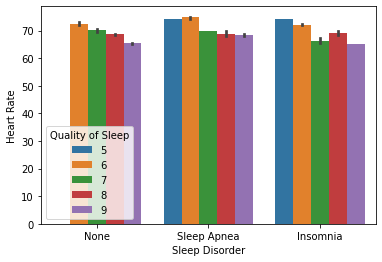

In [81]:
sns.barplot(x=df['Sleep Disorder'],y=df['Heart Rate'],hue=df['Quality of Sleep'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Stress Level'>

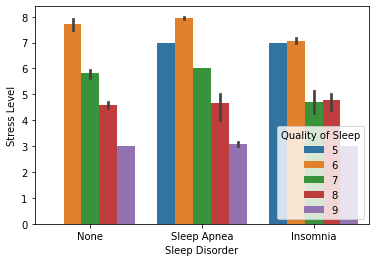

In [82]:
sns.barplot(x=df['Sleep Disorder'],y=df['Stress Level'],hue=df['Quality of Sleep'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Physical Activity Level'>

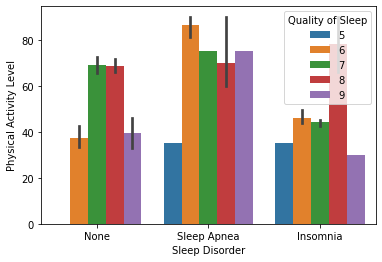

In [83]:
sns.barplot(x=df['Sleep Disorder'],y=df['Physical Activity Level'],hue=df['Quality of Sleep'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Quality of Sleep'>

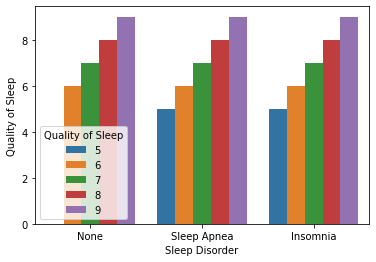

In [84]:
sns.barplot(x=df['Sleep Disorder'],y=df['Quality of Sleep'],hue=df['Quality of Sleep'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Sleep Duration'>

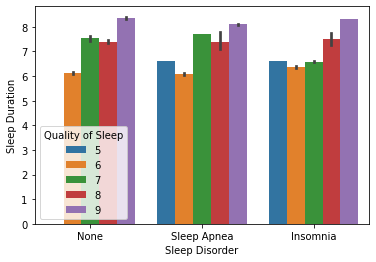

In [85]:
sns.barplot(x=df['Sleep Disorder'],y=df['Sleep Duration'],hue=df['Quality of Sleep'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Age'>

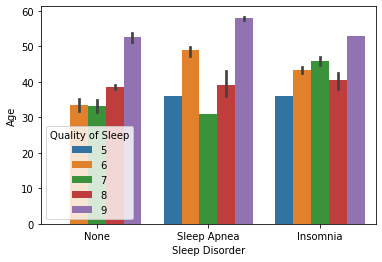

In [86]:
sns.barplot(x=df['Sleep Disorder'],y=df['Age'],hue=df['Quality of Sleep'])

In [87]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


<AxesSubplot:xlabel='Sleep Disorder', ylabel='Age'>

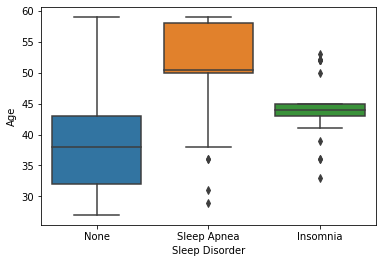

In [88]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Age'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Sleep Duration'>

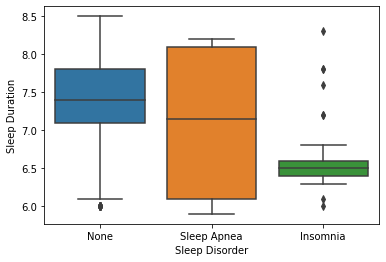

In [89]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Sleep Duration'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Quality of Sleep'>

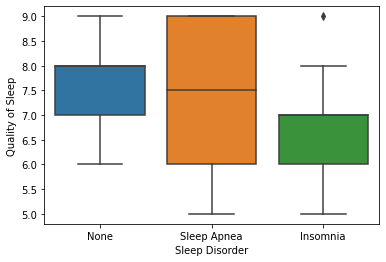

In [90]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Quality of Sleep'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Physical Activity Level'>

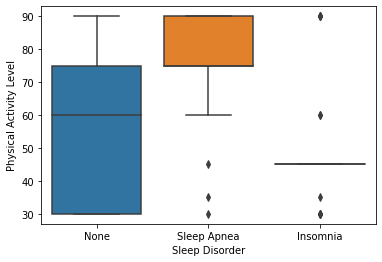

In [91]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Physical Activity Level'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Stress Level'>

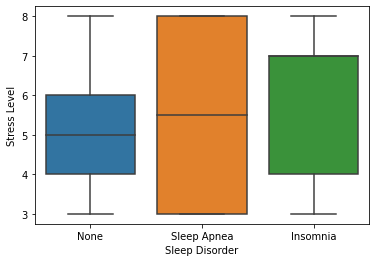

In [92]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Stress Level'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Heart Rate'>

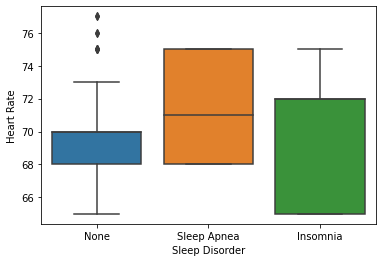

In [93]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Heart Rate'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Daily Steps'>

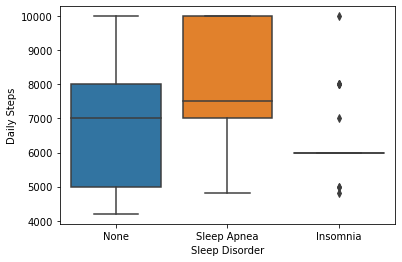

In [94]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Daily Steps'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Age'>

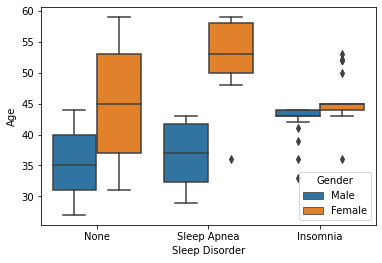

In [95]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Age'],hue=df['Gender'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Daily Steps'>

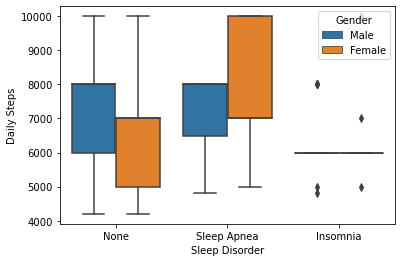

In [96]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Daily Steps'],hue=df['Gender'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Heart Rate'>

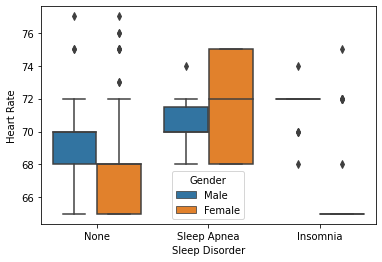

In [97]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Heart Rate'],hue=df['Gender'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Stress Level'>

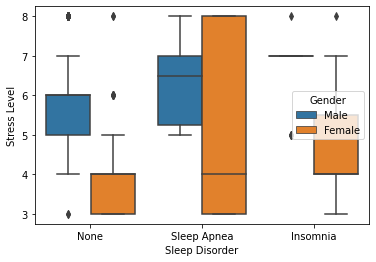

In [98]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Stress Level'],hue=df['Gender'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Physical Activity Level'>

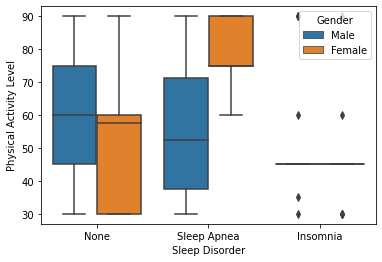

In [99]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Physical Activity Level'],hue=df['Gender'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Quality of Sleep'>

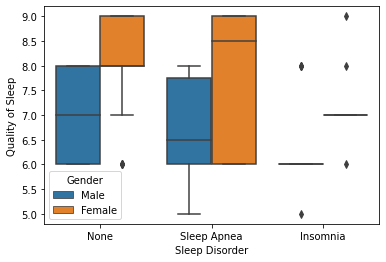

In [100]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Quality of Sleep'],hue=df['Gender'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Sleep Duration'>

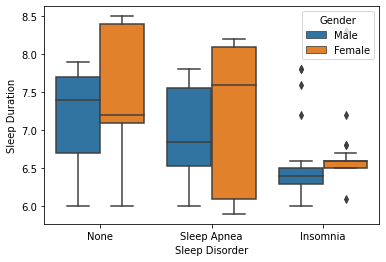

In [101]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Sleep Duration'],hue=df['Gender'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Age'>

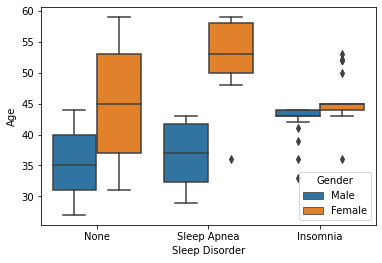

In [102]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Age'],hue=df['Gender'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Age'>

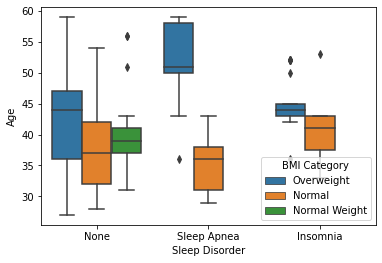

In [103]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Age'],hue=df['BMI Category'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Daily Steps'>

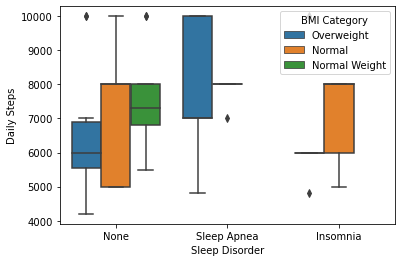

In [104]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Daily Steps'],hue=df['BMI Category'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Heart Rate'>

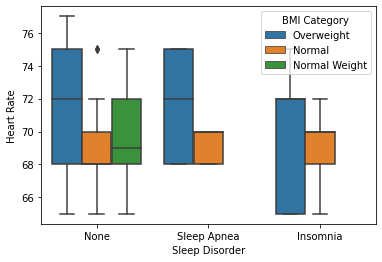

In [105]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Heart Rate'],hue=df['BMI Category'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Stress Level'>

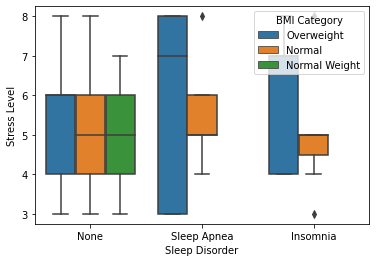

In [106]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Stress Level'],hue=df['BMI Category'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Physical Activity Level'>

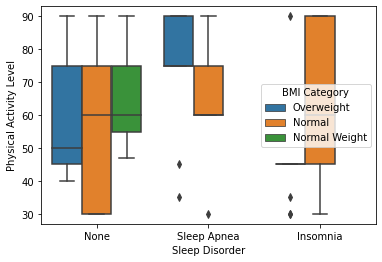

In [107]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Physical Activity Level'],hue=df['BMI Category'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Quality of Sleep'>

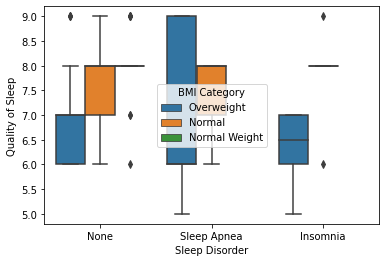

In [108]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Quality of Sleep'],hue=df['BMI Category'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Sleep Duration'>

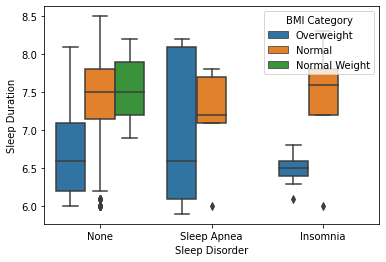

In [109]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Sleep Duration'],hue=df['BMI Category'])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Age'>

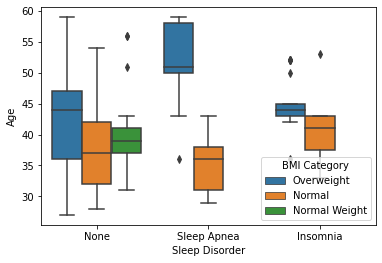

In [110]:
sns.boxplot(x=df['Sleep Disorder'],y=df['Age'],hue=df['BMI Category'])

In [111]:
df['Blood Pressure'].value_counts()


130/85    96
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
125/82     4
128/85     3
115/78     2
119/77     2
126/83     2
129/84     2
128/84     2
117/76     2
118/75     2
121/79     1
118/76     1
122/80     1
Name: Blood Pressure, dtype: int64

In [112]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


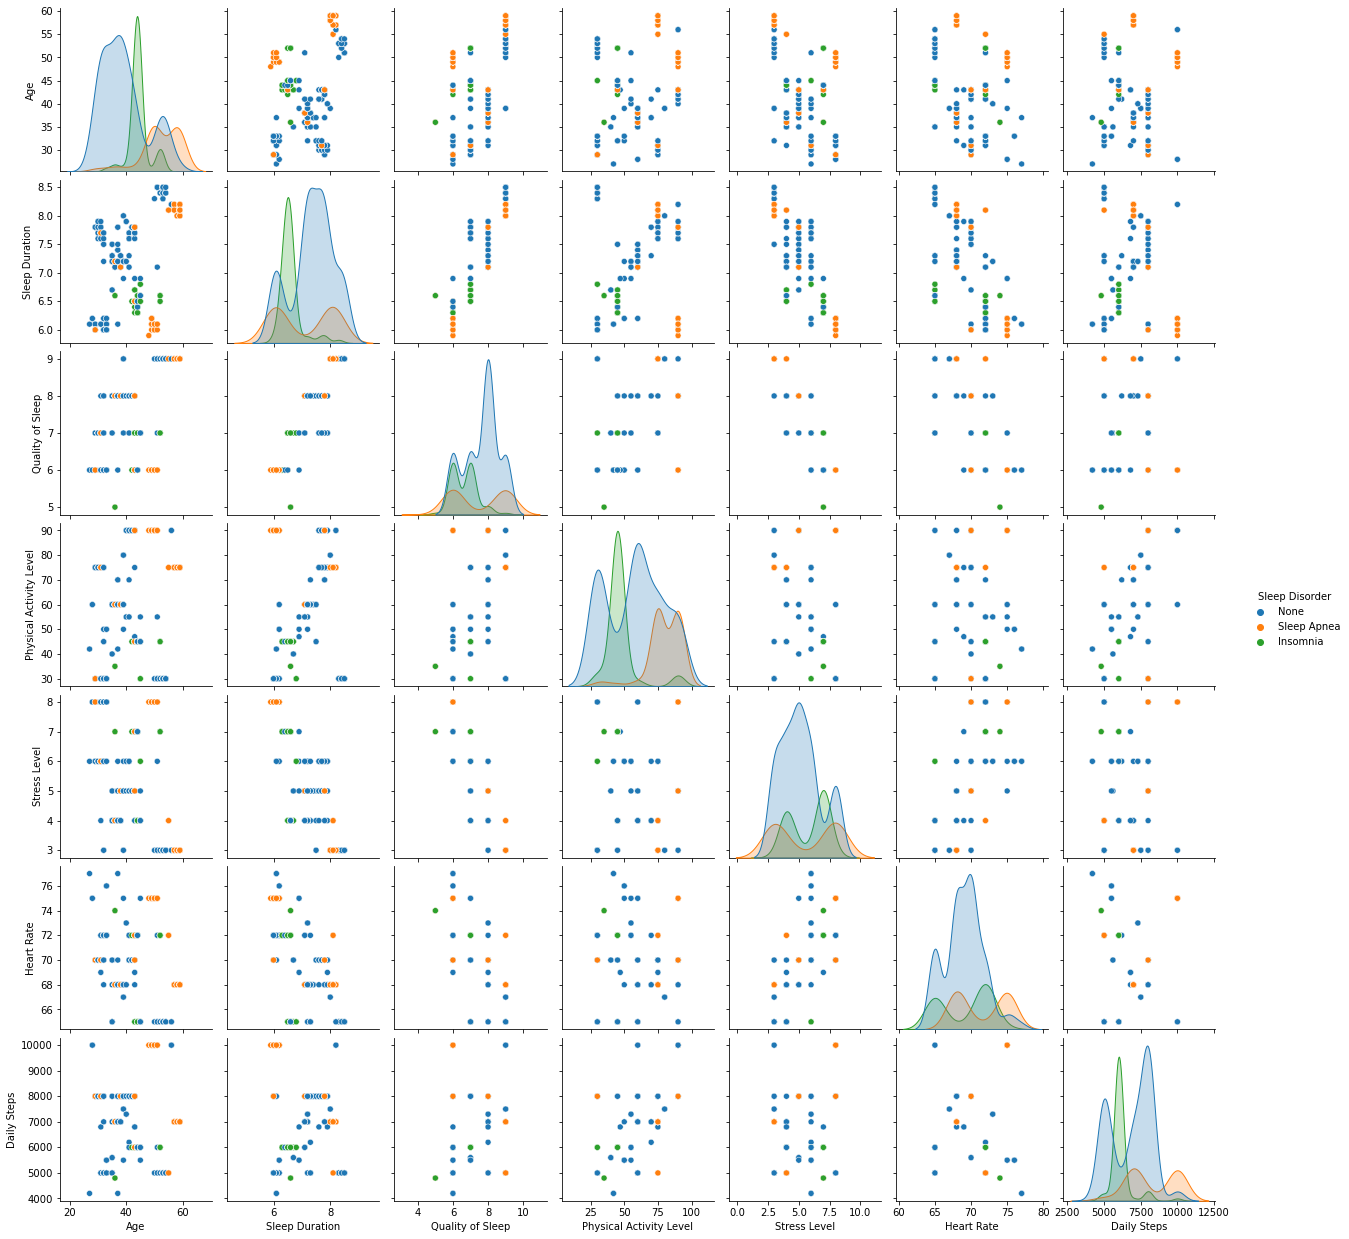

In [113]:
sns.pairplot(data=df,hue='Sleep Disorder')

<AxesSubplot:>

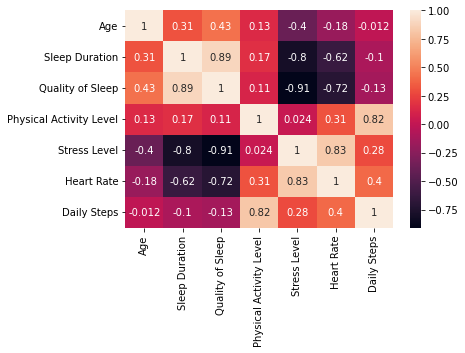

In [114]:
sns.heatmap(df.corr(),annot=True)

In [115]:
df=df.drop(['Sleep Duration','Physical Activity Level','Stress Level'],axis=1)

In [116]:
df.head()

,Gender,Age,Occupation,Quality of Sleep,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6,Normal,125/80,75,10000,None
2,Male,28,Doctor,6,Normal,125/80,75,10000,None
7,Male,29,Doctor,7,Normal,120/80,70,8000,None
8,Male,29,Doctor,7,Normal,120/80,70,8000,None


In [117]:
le=LabelEncoder()


In [118]:
df['Occupation']=le.fit_transform(df['Occupation'])


In [119]:
df['BMI Category']=le.fit_transform(df['BMI Category'])

In [120]:
df['Sleep Disorder']=le.fit_transform(df['Sleep Disorder'])

In [121]:
df['Gender']=le.fit_transform(df['Gender'])

In [122]:
df['Blood Pressure']=le.fit_transform(df['Blood Pressure'])

In [123]:
df

,Gender,Age,Occupation,Quality of Sleep,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,8,6,2,11,77,4200,1
1,1,28,1,6,0,9,75,10000,1
2,1,28,1,6,0,9,75,10000,1
7,1,29,1,7,0,6,70,8000,1
8,1,29,1,7,0,6,70,8000,1
...,...,...,...,...,...,...,...,...,...
369,0,59,5,9,2,17,68,7000,2
370,0,59,5,9,2,17,68,7000,2
371,0,59,5,9,2,17,68,7000,2
372,0,59,5,9,2,17,68,7000,2


In [124]:
X=df.drop('Sleep Disorder',axis=1)

In [125]:
y=df['Sleep Disorder']

In [126]:
smote=SMOTE(sampling_strategy='minority')


In [127]:
X_sm,y_sm=smote.fit_resample(X,y)


In [128]:
X_sm.shape

(507, 8)

In [129]:
y_sm.shape

(507,)

In [130]:
sc=StandardScaler()


In [131]:
X_sm=sc.fit_transform(X_sm)


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

In [133]:
X_train.shape

(405, 8)

In [134]:
X_test.shape

(102, 8)

In [135]:
y_train.shape

(405,)

In [136]:
y_test.shape

(102,)

# RandomForestClassifier

In [137]:
rfc=RandomForestClassifier()

In [138]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [139]:
y_pred=rfc.predict(X_train)


In [140]:
accuracy_score(y_train,y_pred)

0.9530864197530864

In [141]:
y_pred=rfc.predict(X_test)


In [142]:
accuracy_score(y_test,y_pred)

0.9117647058823529

In [143]:
KF=KFold(5)


In [144]:
scores=cross_val_score(rfc,X_test,y_test,cv=KF)


In [145]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.7619047619047619
1 1.0
2 0.75
3 0.9
4 0.9


In [146]:
scores.mean()

0.8623809523809524

In [147]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.89      0.95      0.92        42
           2       0.98      0.86      0.91        50

    accuracy                           0.91       102
   macro avg       0.88      0.94      0.90       102
weighted avg       0.92      0.91      0.91       102



# LogisticRegression

In [148]:
lr=LogisticRegression()


In [149]:
lr.fit(X_train,y_train)

LogisticRegression()

In [150]:
y_pred=lr.predict(X_train)


In [151]:
accuracy_score(y_train,y_pred)

0.9308641975308642

In [152]:
y_pred=lr.predict(X_test)


In [153]:
accuracy_score(y_test,y_pred)

0.9117647058823529

In [154]:
KF=KFold(5)


In [155]:
scores=cross_val_score(lr,X_test,y_test,cv=KF)


In [156]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.8571428571428571
1 0.9523809523809523
2 0.75
3 0.95
4 0.95


In [157]:
scores.mean()

0.891904761904762

In [158]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.89      0.95      0.92        42
           2       0.98      0.86      0.91        50

    accuracy                           0.91       102
   macro avg       0.88      0.94      0.90       102
weighted avg       0.92      0.91      0.91       102



# KNeighborsClassifier

In [159]:
knc=KNeighborsClassifier()


In [160]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [161]:
y_pred=knc.predict(X_train)


In [162]:
accuracy_score(y_train,y_pred)

0.9407407407407408

In [163]:
y_pred=knc.predict(X_test)


In [164]:
accuracy_score(y_test,y_pred)

0.9019607843137255

In [165]:
KF=KFold(5)


In [166]:
scores=cross_val_score(knc,X_test,y_test,cv=KF)


In [167]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.8571428571428571
1 0.9523809523809523
2 0.7
3 0.95
4 0.95


In [168]:
scores.mean()

0.881904761904762

In [169]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.88      0.90      0.89        42
           2       0.98      0.88      0.93        50

    accuracy                           0.90       102
   macro avg       0.86      0.93      0.88       102
weighted avg       0.91      0.90      0.90       102



# XGBClassifier

In [170]:
xgb_i=xgb.XGBClassifier()

In [171]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [172]:
y_pred=xgb_i.predict(X_train)


In [173]:
accuracy_score(y_train,y_pred)

0.9530864197530864

In [174]:
y_pred=xgb_i.predict(X_test)


In [175]:
accuracy_score(y_test,y_pred)

0.9215686274509803

In [176]:
KF=KFold(5)


In [177]:
scores=cross_val_score(xgb_i,X_test,y_test,cv=KF)


In [178]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.7142857142857143
1 1.0
2 0.75
3 0.9
4 0.9


In [179]:
scores.mean()

0.8528571428571429

In [180]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.89      0.95      0.92        42
           2       0.98      0.88      0.93        50

    accuracy                           0.92       102
   macro avg       0.90      0.94      0.92       102
weighted avg       0.93      0.92      0.92       102



# DecisionTreeClassifier

In [181]:
dtc=DecisionTreeClassifier()


In [182]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [183]:
y_pred=dtc.predict(X_train)


In [184]:
accuracy_score(y_train,y_pred)

0.9530864197530864

In [185]:
y_pred=dtc.predict(X_test)


In [186]:
accuracy_score(y_test,y_pred)

0.8823529411764706

In [187]:
KF=KFold(5)


In [188]:
scores=cross_val_score(dtc,X_test,y_test,cv=KF)


In [189]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.7142857142857143
1 0.9523809523809523
2 0.8
3 0.9
4 0.9


In [190]:
scores.mean()

0.8533333333333333

In [191]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       0.88      0.88      0.88        42
           2       0.98      0.86      0.91        50

    accuracy                           0.88       102
   macro avg       0.83      0.91      0.86       102
weighted avg       0.90      0.88      0.89       102



# Naive Bayes Classifier

In [192]:
model=GaussianNB()


In [193]:
model.fit(X_train,y_train)

GaussianNB()

In [194]:
y_pred=model.predict(X_train)


In [195]:
accuracy_score(y_train,y_pred)

0.9160493827160494

In [196]:
y_pred=model.predict(X_test)


In [197]:
accuracy_score(y_test,y_pred)

0.9019607843137255

In [198]:
KF=KFold(5)


In [199]:
scores=cross_val_score(model,X_test,y_test,cv=KF)


In [200]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.8571428571428571
1 1.0
2 0.85
3 0.9
4 0.95


In [201]:
scores.mean()

0.9114285714285714

In [202]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.88      0.90      0.89        42
           2       0.98      0.88      0.93        50

    accuracy                           0.90       102
   macro avg       0.86      0.93      0.88       102
weighted avg       0.91      0.90      0.90       102

